
## This code applies the Logistic Regression classification algorithm to the iris data set.
## The weights used for computing the activation function are optimized by minimizing the log-likelihood cost function using the gradient-descent method. 

## For more information about the logistic regression classifier and the log-likelihood cost function, see the following book: "Python Machine Learning" by Sebastian Raschka (Chapter 3).
  
## This code is a modification of the Adaptive Linear Neuron (Adaline) code provided in the above-mentioned book.

## Created on Jul 28, 2018

## @author: Benjamin Tayo


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Define logistic function

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

## Define Logistic Regression gradient-descent class 

In [3]:
class lrGD(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
           output = self.net_input(X)
           errors = (y - output)
           self.w_[1:] += self.eta * X.T.dot(errors)
           self.w_[0] += self.eta * errors.sum()
           cost = -np.dot(y, np.log(output)) - np.dot(1-y, np.log(1 - output))
           self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return sigmoid(np.dot(X, self.w_[1:]) + self.w_[0])
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.5, 1, 0)   


## Import the iris dataset

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


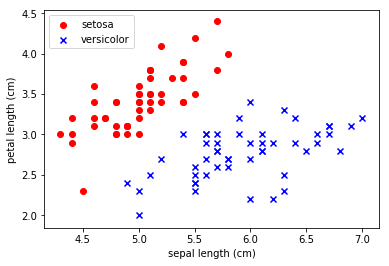

In [4]:
df = pd.read_csv('iris.data.csv', header=None)
print(df.tail())
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, 0:4].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

## Standardize the features

In [5]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
X_std[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()

# Plot cost function for different learning rates

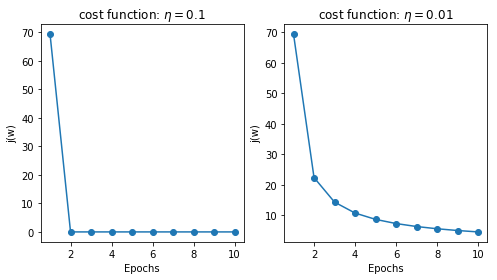

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = lrGD(n_iter=10, eta=0.1).fit(X_std, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('j(w)')
ax[0].set_title('cost function: $\eta =0.1$')
ada2 = lrGD(n_iter=10, eta=0.01).fit(X_std, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('j(w)')
ax[1].set_title('cost function: $\eta=0.01$')
plt.show()


# Function to plot decision boundary

In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


# Plot decision boundary  

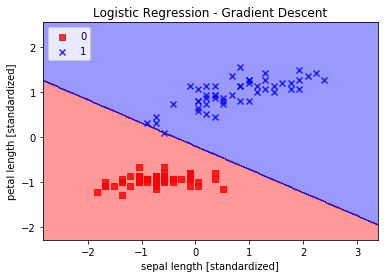

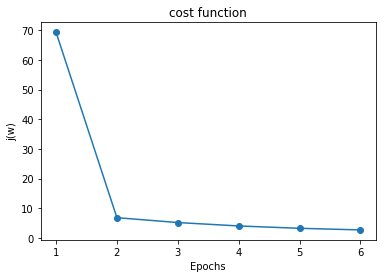

In [8]:
ada = lrGD(n_iter=6, eta=0.1)
ada.fit(X_std[:,[0,2]], y)
plot_decision_regions(X_std[:,[0,2]], y, classifier=ada)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('j(w)')
plt.title('cost function')
plt.show()

# Use lrGD model to predict class labels

In [9]:
ada = lrGD(n_iter=6, eta=0.1)
ada.fit(X_std, y)
print('Number of misclassifications: %d' % (X_std.shape[0] -np.where(ada.predict(X_std)==y,1,0).sum()))

Number of misclassifications: 0
